# 10.1 핵심 개념
- 부스팅 : 여러 개의 약한 학습기를 순차적으로 학습시켜 예측하면서 잘 못 예측한 데이터에 가중치를 부여하여 오류를 개선해 나가며 학습하는 앙상블 모델
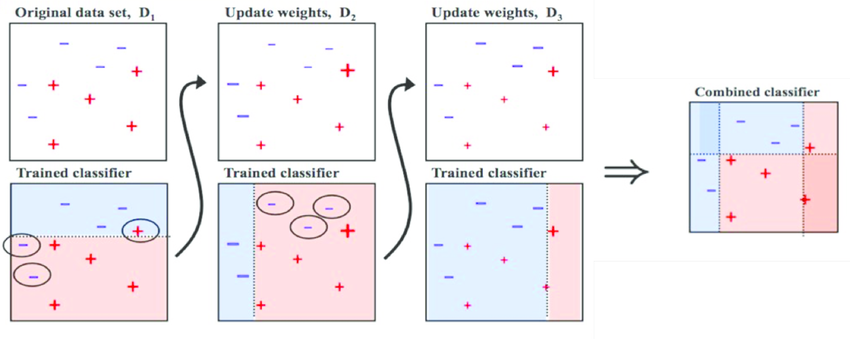

# 10.3 분석 코드

## Part1. 분류

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
data=pd.read_csv('../data/breast-cancer-wisconsin.csv', encoding='utf-8')

X=data[data.columns[1:-1]]
y=data[['Class']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, stratify=y, random_state=42)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_scaled_train=scaler.transform(X_train)
X_scaled_test=scaler.transform(X_test)

#AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier()
model.fit(X_scaled_train, y_train)

pred_train=model.predict(X_scaled_train)
pred_test=model.predict(X_scaled_test)
print(f"TrainSet Score : {model.score(X_scaled_train, y_train)}\nTestSet Score: {model.score(X_scaled_test, y_test)}")

TrainSet Score : 0.994140625
TestSet Score: 0.9649122807017544


In [2]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_train=confusion_matrix(y_train, pred_train)
cfreport_train=classification_report(y_train, pred_train)
print(f"TrainSet 오차행렬 : \n{confusion_train}\n분류예측 레포트 : \n{cfreport_train}")

TrainSet 오차행렬 : 
[[331   2]
 [  1 178]]
분류예측 레포트 : 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       333
           1       0.99      0.99      0.99       179

    accuracy                           0.99       512
   macro avg       0.99      0.99      0.99       512
weighted avg       0.99      0.99      0.99       512



In [3]:
confusion_test=confusion_matrix(y_test, pred_test)
cfreport_test=classification_report(y_test, pred_test)
print(f"TestSet 오차행렬 : \n{confusion_test}\n분류예측 레포트 : \n{cfreport_test}")

TestSet 오차행렬 : 
[[107   4]
 [  2  58]]
분류예측 레포트 : 
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       111
           1       0.94      0.97      0.95        60

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



In [4]:
#GradientBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier()
model.fit(X_scaled_train, y_train)

pred_train=model.predict(X_scaled_train)
pred_test=model.predict(X_scaled_test)
print(f"TrainSet Score : {model.score(X_scaled_train, y_train)}\nTestSet Score: {model.score(X_scaled_test, y_test)}")

TrainSet Score : 1.0
TestSet Score: 0.9649122807017544


In [5]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_train=confusion_matrix(y_train, pred_train)
cfreport_train=classification_report(y_train, pred_train)
print(f"TrainSet 오차행렬 : \n{confusion_train}\n분류예측 레포트 : \n{cfreport_train}")

TrainSet 오차행렬 : 
[[333   0]
 [  0 179]]
분류예측 레포트 : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       333
           1       1.00      1.00      1.00       179

    accuracy                           1.00       512
   macro avg       1.00      1.00      1.00       512
weighted avg       1.00      1.00      1.00       512



In [6]:
confusion_test=confusion_matrix(y_test, pred_test)
cfreport_test=classification_report(y_test, pred_test)
print(f"TestSet 오차행렬 : \n{confusion_test}\n분류예측 레포트 : \n{cfreport_test}")

TestSet 오차행렬 : 
[[106   5]
 [  1  59]]
분류예측 레포트 : 
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       111
           1       0.92      0.98      0.95        60

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



## Part2. 회귀

In [10]:
data2=pd.read_csv('../data/house_price.csv', encoding='utf-8')
X=data2[data2.columns[:-1]]
y=data2[['house_value']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_scaled_train=scaler.transform(X_train)
X_scaled_test=scaler.transform(X_test)

from sklearn.ensemble import AdaBoostRegressor
model=AdaBoostRegressor()
model.fit(X_scaled_train, y_train)

AdaBoostRegressor()

In [11]:
pred_train=model.predict(X_scaled_train)
pred_test=model.predict(X_scaled_test)
print("TrainSet Score : ", model.score(X_scaled_train, y_train))
print("testSet Score : ", model.score(X_scaled_test, y_test))

TrainSet Score :  0.4500813536995365
testSet Score :  0.44555332159923733


In [12]:
import numpy as np
from sklearn.metrics import mean_squared_error
RMSE_train=np.sqrt(mean_squared_error(y_train, pred_train))
RMSE_test=np.sqrt(mean_squared_error(y_test, pred_test))
print(f"TrainSet RMSE : {RMSE_train}\nTestSet RMSE : {RMSE_test}")

TrainSet RMSE : 70778.3227416819
TestSet RMSE : 71185.63556901032


In [13]:
from sklearn.ensemble import GradientBoostingRegressor
model=GradientBoostingRegressor()
model.fit(X_scaled_train, y_train)

GradientBoostingRegressor()

In [14]:
pred_train=model.predict(X_scaled_train)
pred_test=model.predict(X_scaled_test)
print("TrainSet Score : ", model.score(X_scaled_train, y_train))
print("testSet Score : ", model.score(X_scaled_test, y_test))

TrainSet Score :  0.6528129290117282
testSet Score :  0.6255645531691292


In [15]:
import numpy as np
from sklearn.metrics import mean_squared_error
RMSE_train=np.sqrt(mean_squared_error(y_train, pred_train))
RMSE_test=np.sqrt(mean_squared_error(y_test, pred_test))
print(f"TrainSet RMSE : {RMSE_train}\nTestSet RMSE : {RMSE_test}")

TrainSet RMSE : 56238.38181258093
TestSet RMSE : 58499.33802668414
